In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from fortuna.prob_model.posterior.gaussian_process.kernel import RBF
from fortuna.prob_model.posterior.gaussian_process.gp import GP, Gaussian, MarginalLogLikelihood
import jax.numpy as jnp 
import jax.random as jr 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

key = jr.PRNGKey(123)

In [5]:
def matshow_subplots(fig, ax, matrix):
    im = ax.matshow(matrix)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    return fig, ax 

Text(0.5, 1.0, '$K_{ff} + \\sigma^2$')

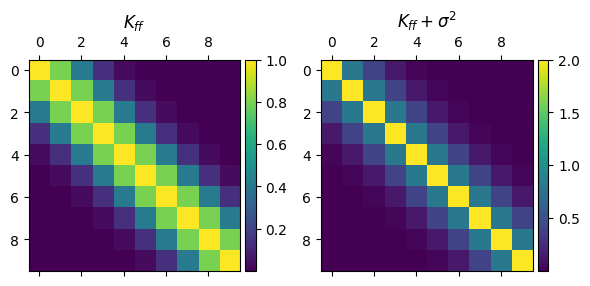

In [11]:
x = jnp.linspace(-3., 3., 10).reshape(-1, 1)

kernel = RBF()
variables = kernel.init(key, x)

Kff = kernel.apply(variables, x)

lik = Gaussian()
lvariables = lik.init(key, Kff)

sigmaKff = lik.apply(lvariables, Kff)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(6, 3), tight_layout=True)
[matshow_subplots(fig, a, m) for a, m in zip([ax0, ax1], [Kff, sigmaKff])]
ax0.set_title(r'$K_{ff}$')
ax1.set_title(r'$K_{ff} + \sigma^2$')

# Proposed API

## High-level questions 9/3

- Can I access the variables as a dict within `__call__`? 
  - If so, would it make sense to define `kernel_fn` with inputs `xi, yj, **params`?
- Any thoughts on how we handle transformations/parameters' meta information?
- How can other Flax modules be accessed inside one another?
- What is the difference between using `@nn.compact` and `setup` in Flax?

In [14]:
gaussian_process = SparseGP(RBF(), InducingPoints())

variables = gaussian_process.init(key, x, jnp.zeros(x.shape[0]), x)

objective_fn = MarginalLogLikelihood(gaussian_process)
objective_fn = VariationalObj(gaussian_process)

# posterior_approximator=GaussianProcessPosteriorApproximator(objective_fn=...)

AttributeError: 'Array' object has no attribute 'items'